# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [17]:
using Clustering, CSV, DataFrames,Gadfly

## 讀取資料

In [5]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [9]:
X = Matrix(data)

5000×2 Array{Int64,2}:
 664159  550946
 665845  557965
 597173  575538
 618600  551446
 635690  608046
 588100  557588
 582015  546191
 604678  574577
 572029  518313
 604737  574591
 577728  587566
 602013  574722
 627968  574625
      ⋮        
 673140  864863
 681053  892766
 683321  873932
 701017  931252
 645677  814395
 677362  853471
 659046  930099
 665426  853940
 691827  863963
 650661  861267
 599647  858702
 684091  842566

In [11]:
X = transpose(X)

2×5000 LinearAlgebra.Transpose{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [12]:
k = 15
result = kmeans(X,k)

KmeansResult{Array{Float64,2},Float64,Int64}([417799.6942675159 827814.3603174603 … 262298.5420560748 840080.0891089109; 787001.9936305733 234912.37936507937 … 844866.4299065421 694585.6435643565], [13, 13, 13, 13, 13, 13, 13, 13, 13, 13  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [314, 630, 335, 127, 352, 344, 340, 350, 669, 351, 353, 223, 297, 214, 101], [314, 630, 335, 127, 352, 344, 340, 350, 669, 351, 353, 223, 297, 214, 101], 1.789714303246755e13, 17, true)

In [14]:
data[!,:cluster] = string.(assignments(result))

5000-element Array{String,1}:
 "13"
 "13"
 "13"
 "13"
 "13"
 "13"
 "13"
 "13"
 "13"
 "13"
 "13"
 "13"
 "13"
 ⋮   
 "5" 
 "5" 
 "5" 
 "5" 
 "5" 
 "5" 
 "5" 
 "5" 
 "5" 
 "5" 
 "5" 
 "5" 

In [15]:
result.centers

2×15 Array{Float64,2}:
      4.178e5  8.27814e5  1.68295e5  2.14925e5  …  2.62299e5  8.4008e5 
 787002.0      2.34912e5  3.47725e5  8.52319e5     8.44866e5  6.94586e5

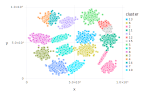

In [19]:
plot(data, x="x", y="y" ,color="cluster", Geom.point)